<a href="https://colab.research.google.com/github/WilliamMejiaG/ML_based_novel_catalysts_discovery/blob/main/ML_for_catalyst_discovery.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import rc_params
from matplotlib import cm
from matplotlib.gridspec import GridSpec
import seaborn as sns
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import RandomizedSearchCV
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import ExtraTreesRegressor
from sklearn.svm import SVR
from xgboost import XGBRegressor
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

In [3]:
!pip install pandas plotnine

In [4]:
from plotnine import *

In [5]:
raw_data = pd.read_excel('/content/drive/MyDrive/CODING_DOJO/CATALYST_LITERATURE/OCM_DATA_BASE_SHEET_2.xlsx', sheet_name = 'OCM_Dataset_corrected')
raw_data.head()

,Catalyst Nr,Nr of publication,Cation 1,Cation 1 mol%,Cation 2,Cation 2 mol%,Cation 3,Cation 3 mol%,Cation 4,Cation 4 mol%,...,p(CH4)/p(O2),"p total, bar","Contact time, s","X(O2), %","X(CH4), %","S(COx), %","S(C2=), %","S(C2-), %","S(C2), %","Y(C2), %"
0,1,1,Mn,9.2,NaN,NaN,NaN,NaN,NaN,NaN,...,4.761905,1.013,0.04,NaN,11.0,NaN,NaN,NaN,45.500000,5.0050
1,2,1,Cd,4.7,NaN,NaN,NaN,NaN,NaN,NaN,...,4.761905,1.013,0.04,NaN,10.0,NaN,NaN,NaN,40.000000,4.0000
2,3,1,Sn,4.5,NaN,NaN,NaN,NaN,NaN,NaN,...,4.761905,1.013,0.04,NaN,8.4,NaN,NaN,NaN,4.800000,0.4032
3,4,1,Ti,10.4,NaN,NaN,NaN,NaN,NaN,NaN,...,4.761905,1.013,0.04,NaN,6.8,NaN,NaN,NaN,44.099998,2.9988
4,5,1,Pt,2.8,NaN,NaN,NaN,NaN,NaN,NaN,...,4.761905,1.013,0.04,NaN,8.0,NaN,NaN,NaN,1.300000,0.1040


In [6]:
raw_data.columns

Index(['Catalyst Nr', 'Nr of publication', 'Cation 1', 'Cation 1 mol%',
       'Cation 2', 'Cation 2 mol%', 'Cation 3', 'Cation 3 mol%', 'Cation 4',
       'Cation 4 mol%', 'Anion 1', 'Anion 1 mol%', 'Anion 2', 'Anion 2 mol%',
       'Promotor', 'Support 1', 'Support 1 mol%', 'Support 2',
       'Support 2 mol%', 'Preparation', 'Temperature, K', 'p(CH4), bar',
       'p(O2), bar', 'p(CH4)/p(O2)', 'p total, bar', 'Contact time, s',
       'X(O2), %', 'X(CH4), %', 'S(COx), %', 'S(C2=), %', 'S(C2-), %',
       'S(C2), %', 'Y(C2), %'],
      dtype='object')

In [7]:
raw_data.columns = raw_data.columns.str.replace(' ','_')

In [8]:
raw_data.columns

Index(['Catalyst_Nr', 'Nr_of_publication', 'Cation_1', 'Cation_1_mol%',
       'Cation_2', 'Cation_2_mol%', 'Cation_3', 'Cation_3_mol%', 'Cation_4',
       'Cation_4_mol%', 'Anion_1', 'Anion_1_mol%', 'Anion_2', 'Anion_2_mol%',
       'Promotor', 'Support_1', 'Support_1_mol%', 'Support_2',
       'Support_2_mol%', 'Preparation', 'Temperature,_K', 'p(CH4),_bar',
       'p(O2),_bar', 'p(CH4)/p(O2)', 'p_total,_bar', 'Contact_time,_s',
       'X(O2),_%', 'X(CH4),_%', 'S(COx),_%', 'S(C2=),_%', 'S(C2-),_%',
       'S(C2),_%', 'Y(C2),_%'],
      dtype='object')

In [9]:
cation_1 = raw_data.pivot(columns = 'Cation_1', values = 'Cation_1_mol%')
cation_2 = raw_data.pivot(columns = 'Cation_2', values = 'Cation_2_mol%')
cation_3 = raw_data.pivot(columns = 'Cation_3', values = 'Cation_3_mol%')
cation_4 = raw_data.pivot(columns = 'Cation_4', values = 'Cation_4_mol%')
anion_1 =raw_data.pivot(columns = 'Anion_1', values = 'Anion_1_mol%' )
anion_2 =raw_data.pivot(columns = 'Anion_2', values = 'Anion_2_mol%' )
support_1 = raw_data.pivot(columns = 'Support_1', values = 'Support_1_mol%')
support_2 = raw_data.pivot(columns = 'Support_2', values = 'Support_2_mol%')
list_elements = [cation_1,cation_2,cation_3,cation_4, anion_1,anion_2,support_1,support_2]

In [10]:
concat_pivot_list = pd.concat(list_elements, axis = 1, sort= True)

In [11]:
concat_pivot_list.head()

,Ag,Al,Au,Ba,Be,Bi,Ca,Cd,Ce,Co,...,Tb,Ti,Y,Yb,Zn,Zr,NaN,Al,C,Si
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4.7,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [12]:
composition = concat_pivot_list.groupby(level = 0, axis = 1).sum()/100

In [13]:
composition.head()

,Ag,Al,Au,B,Ba,Be,Bi,Br,C,Ca,...,Te,Th,Ti,Tm,V,W,Y,Yb,Zn,Zr
0,0.0,0.908,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.000,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.953,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.000,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.955,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.000,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.896,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.104,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.972,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.000,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [14]:
pub_nr = raw_data.loc[:,'Catalyst_Nr']
reaction_data = raw_data.loc[:,['Temperature,_K', 'p(CH4),_bar',
       'p(O2),_bar', 'p(CH4)/p(O2)', 'p_total,_bar','X(CH4),_%',
       'S(C2),_%', 'Y(C2),_%']]

In [15]:
df_list = [pub_nr, composition, reaction_data]
df = pd.concat(df_list, axis = 1, sort = True)

In [16]:
df.head()

,Catalyst_Nr,Ag,Al,Au,B,Ba,Be,Bi,Br,C,...,Zn,Zr,"Temperature,_K","p(CH4),_bar","p(O2),_bar",p(CH4)/p(O2),"p_total,_bar","X(CH4),_%","S(C2),_%","Y(C2),_%"
0,1,0.0,0.908,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1073,0.4,0.084,4.761905,1.013,11.0,45.500000,5.0050
1,2,0.0,0.953,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1073,0.4,0.084,4.761905,1.013,10.0,40.000000,4.0000
2,3,0.0,0.955,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1073,0.4,0.084,4.761905,1.013,8.4,4.800000,0.4032
3,4,0.0,0.896,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1073,0.4,0.084,4.761905,1.013,6.8,44.099998,2.9988
4,5,0.0,0.972,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1073,0.4,0.084,4.761905,1.013,8.0,1.300000,0.1040


In [17]:
df['S(C2),_%'].min()

0.0

In [18]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1802 entries, 0 to 1801
Data columns (total 77 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Catalyst_Nr     1802 non-null   int64  
 1   Ag              1802 non-null   float64
 2   Al              1802 non-null   float64
 3   Au              1802 non-null   float64
 4   B               1802 non-null   float64
 5   Ba              1802 non-null   float64
 6   Be              1802 non-null   float64
 7   Bi              1802 non-null   float64
 8   Br              1802 non-null   float64
 9   C               1802 non-null   float64
 10  Ca              1802 non-null   float64
 11  Cd              1802 non-null   float64
 12  Ce              1802 non-null   float64
 13  Cl              1802 non-null   float64
 14  Co              1802 non-null   float64
 15  Cr              1802 non-null   float64
 16  Cs              1802 non-null   float64
 17  Cu              1802 non-null   f

In [19]:
df['S(C2),_%'] = df['S(C2),_%'].fillna(df['S(C2),_%'].mean())
df['X(CH4),_%'] = df['X(CH4),_%'].fillna(df['X(CH4),_%'].mean())

In [20]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1802 entries, 0 to 1801
Data columns (total 77 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Catalyst_Nr     1802 non-null   int64  
 1   Ag              1802 non-null   float64
 2   Al              1802 non-null   float64
 3   Au              1802 non-null   float64
 4   B               1802 non-null   float64
 5   Ba              1802 non-null   float64
 6   Be              1802 non-null   float64
 7   Bi              1802 non-null   float64
 8   Br              1802 non-null   float64
 9   C               1802 non-null   float64
 10  Ca              1802 non-null   float64
 11  Cd              1802 non-null   float64
 12  Ce              1802 non-null   float64
 13  Cl              1802 non-null   float64
 14  Co              1802 non-null   float64
 15  Cr              1802 non-null   float64
 16  Cs              1802 non-null   float64
 17  Cu              1802 non-null   f

In [21]:
print(composition.mean(axis = 0).sort_values(ascending= False).head(18).keys())

Index(['Mg', 'Ca', 'Si', 'La', 'Al', 'Li', 'Ba', 'Sr', 'Zr', 'Na', 'Ti', 'Mn',
       'Nd', 'Cl', 'Sm', 'Y', 'Zn', 'Ce'],
      dtype='object')


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


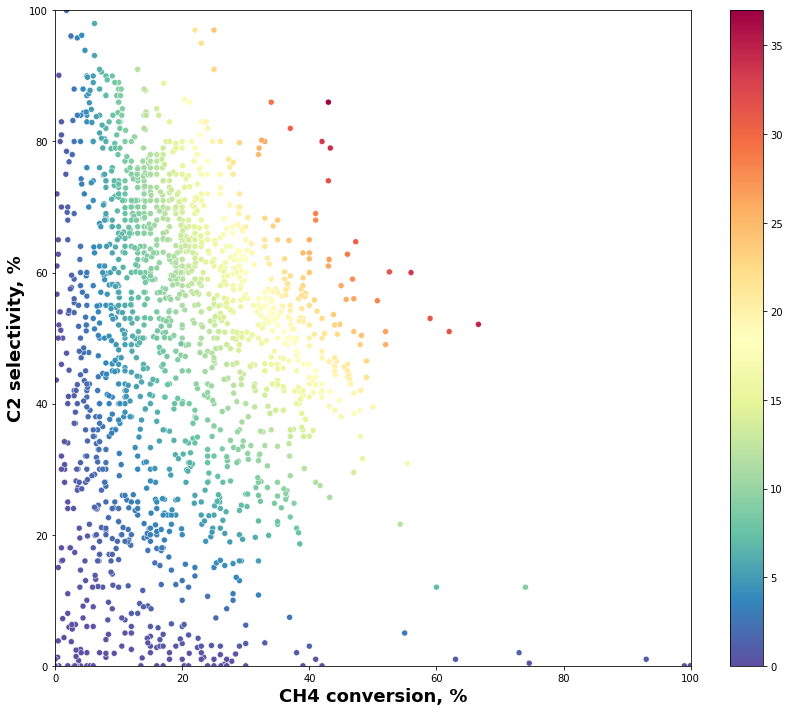

In [22]:
fig, ax = plt.subplots(nrows = 1, ncols = 1, figsize = (12,10))
norm = plt.Normalize(df['Y(C2),_%'].min(), df['Y(C2),_%'].max())
sm = plt.cm.ScalarMappable(cmap= 'Spectral_r', norm=norm)
sns.scatterplot(df['X(CH4),_%'],df['S(C2),_%'], hue= df['Y(C2),_%'],palette = 'Spectral_r' ,ax= ax)
ax.set_xlim(0,100)
ax.set_ylim(0,100)
ax.set_xlabel('CH4 conversion, %', fontsize = 18, fontweight = 'bold')
ax.set_ylabel('C2 selectivity, %', fontsize = 18, fontweight = 'bold')
ax.get_legend().remove()
ax.figure.colorbar(sm)
plt.tight_layout()
plt.savefig('selconyield.png', dpi = 300)


In [23]:
df['Temperature,_C']= df['Temperature,_K']-273.15

In [24]:
df['Temperature,_C'].min()

499.85

In [25]:
df['Temperature,_C'].max()

949.85

In [26]:
df['Temperature_range'] = pd.cut(df['Temperature,_C'], bins = [500,600,700,800,900,1000], labels = ['500<T<=600', '600<T<=700', '700<T<=800','800<T<=900','900<T<=1000'])

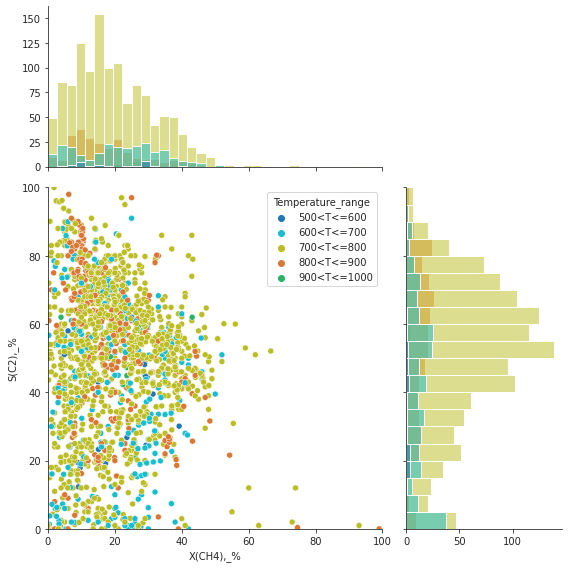

In [27]:
#,'#ff7f0e'
colors = ['#1f77b4','#17becf','#bcbd22', '#DC7633','#28B463']
sns.set_style("ticks")
g = sns.JointGrid(x=df['X(CH4),_%'], y=df['S(C2),_%'],hue = df['Temperature_range'],palette = colors,xlim = (0,100),ylim = (0,100),height=8,ratio=2, space=0.1, 
                  marginal_ticks=True)
g.plot(sns.scatterplot, sns.histplot)
plt.tight_layout()
plt.savefig('Temp.png', dpi= 300)

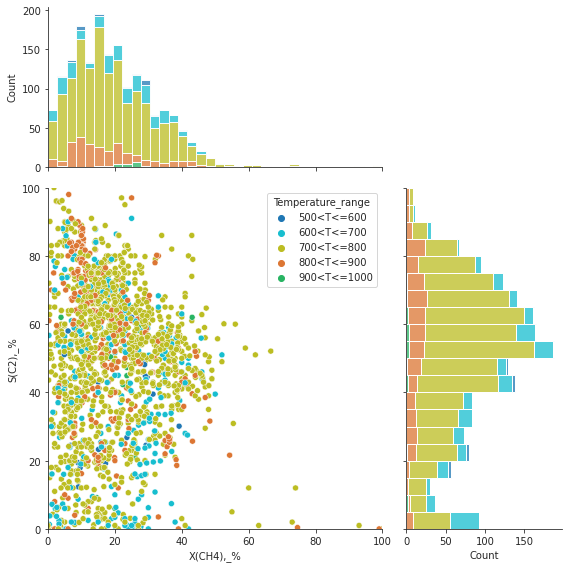

In [28]:
colors = ['#1f77b4','#17becf','#bcbd22', '#DC7633','#28B463']
g = sns.JointGrid(data=df, x='X(CH4),_%', y='S(C2),_%', hue='Temperature_range', palette = colors, xlim = (0,100),ylim = (0,100),height=8,ratio=2, space=0.09, 
                  marginal_ticks=True)
g.plot_joint(sns.scatterplot)

# top marginal
sns.histplot(data=df, x='X(CH4),_%', hue='Temperature_range', ax=g.ax_marg_x, legend=False, multiple='stack', palette = colors)
# right marginal
sns.histplot(data=df, y='S(C2),_%', hue='Temperature_range',  ax=g.ax_marg_y, legend=False, multiple='stack', palette = colors)
plt.tight_layout()
plt.savefig('Temp_1.png', dpi= 300)

In [29]:
df['feed_ratio'] = pd.cut(df['p(CH4)/p(O2)'], bins = [0, 10, 20, 30, 40], labels = ['0<FR<=10','10<FR<=20','20<FR<=30','30<FR<40'])

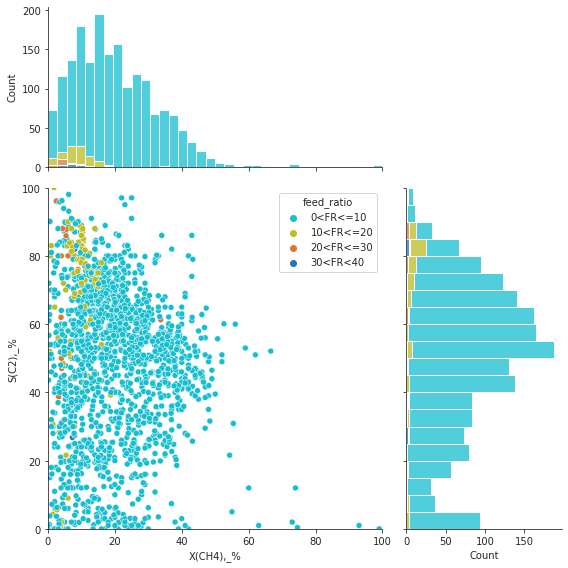

In [30]:
colors = ['#17becf','#bcbd22', '#DC7633','#1f77b4']
g = sns.JointGrid(data=df, x='X(CH4),_%', y='S(C2),_%', hue='feed_ratio', palette = colors, xlim = (0,100),ylim = (0,100),height=8,ratio=2, space=0.09, 
                  marginal_ticks=True)
g.plot_joint(sns.scatterplot)

# top marginal
sns.histplot(data=df, x='X(CH4),_%', hue='feed_ratio', ax=g.ax_marg_x, legend=False, multiple='stack', palette = colors)
# right marginal
sns.histplot(data=df, y='S(C2),_%', hue='feed_ratio',  ax=g.ax_marg_y, legend=False, multiple='stack', palette = colors)
plt.tight_layout()
plt.savefig('FR.png', dpi= 300)

In [31]:
df['pressure_range'] = pd.cut(df['p_total,_bar'], bins = [0,1,2,3,4,5], labels = ['0<P<=1','1<P<=2','2<P<=3','3<P<=4','4<P<=5']) 

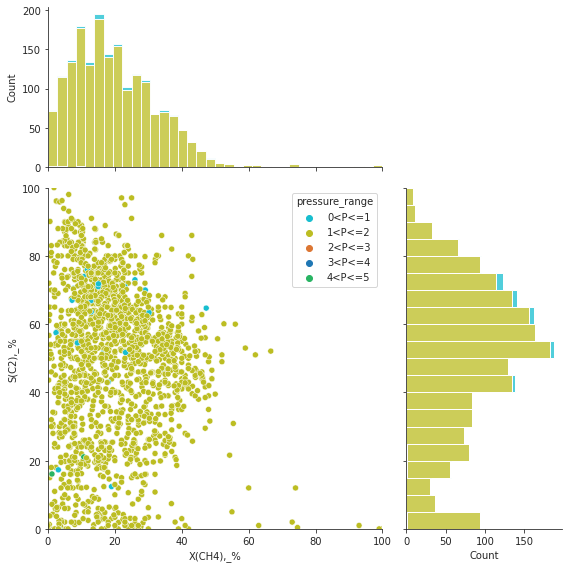

In [32]:
colors = ['#17becf','#bcbd22', '#DC7633','#1f77b4','#28B463']
g = sns.JointGrid(data=df, x='X(CH4),_%', y='S(C2),_%', hue='pressure_range', palette = colors, xlim = (0,100),ylim = (0,100),height=8,ratio=2, space=0.09, 
                  marginal_ticks=True)
g.plot_joint(sns.scatterplot)

# top marginal
sns.histplot(data=df, x='X(CH4),_%', hue='pressure_range', ax=g.ax_marg_x, legend=False, multiple='stack', palette = colors)
# right marginal
sns.histplot(data=df, y='S(C2),_%', hue='pressure_range',  ax=g.ax_marg_y, legend=False, multiple='stack', palette = colors)
plt.tight_layout()
plt.savefig('PR.png', dpi= 300)

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


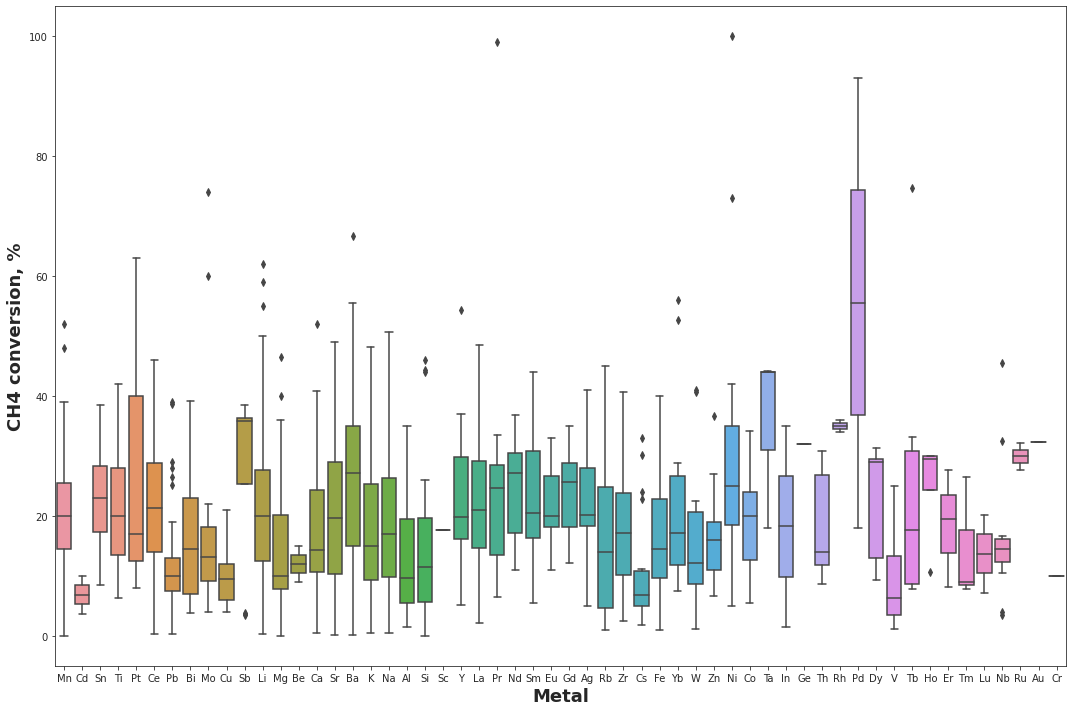

In [33]:
fig, ax = plt.subplots(nrows = 1, ncols = 1, figsize = (15,10))
sns.boxplot(raw_data['Cation_1'], raw_data['X(CH4),_%'], ax = ax)
ax.set_ylabel('CH4 conversion, %', fontsize = 18, fontweight = 'bold')
ax.set_xlabel('Metal', fontsize = 18, fontweight = 'bold')
plt.tight_layout()
plt.savefig('convmetal.png', dpi= 300)

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


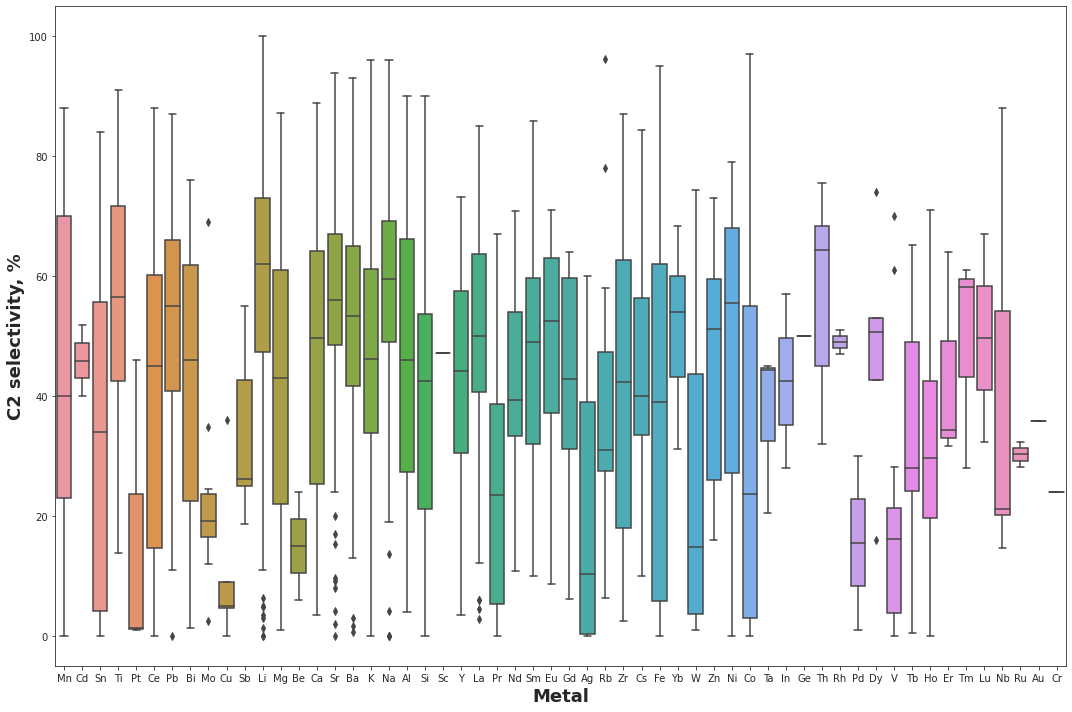

In [34]:
fig, ax = plt.subplots(nrows = 1, ncols = 1, figsize = (15,10))
sns.boxplot(raw_data['Cation_1'], raw_data['S(C2),_%'], ax = ax)
ax.set_ylabel('C2 selectivity, %', fontsize = 18, fontweight = 'bold')
ax.set_xlabel('Metal', fontsize = 18, fontweight = 'bold')
plt.tight_layout()
plt.savefig('selecmetal.png', dpi= 300)

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


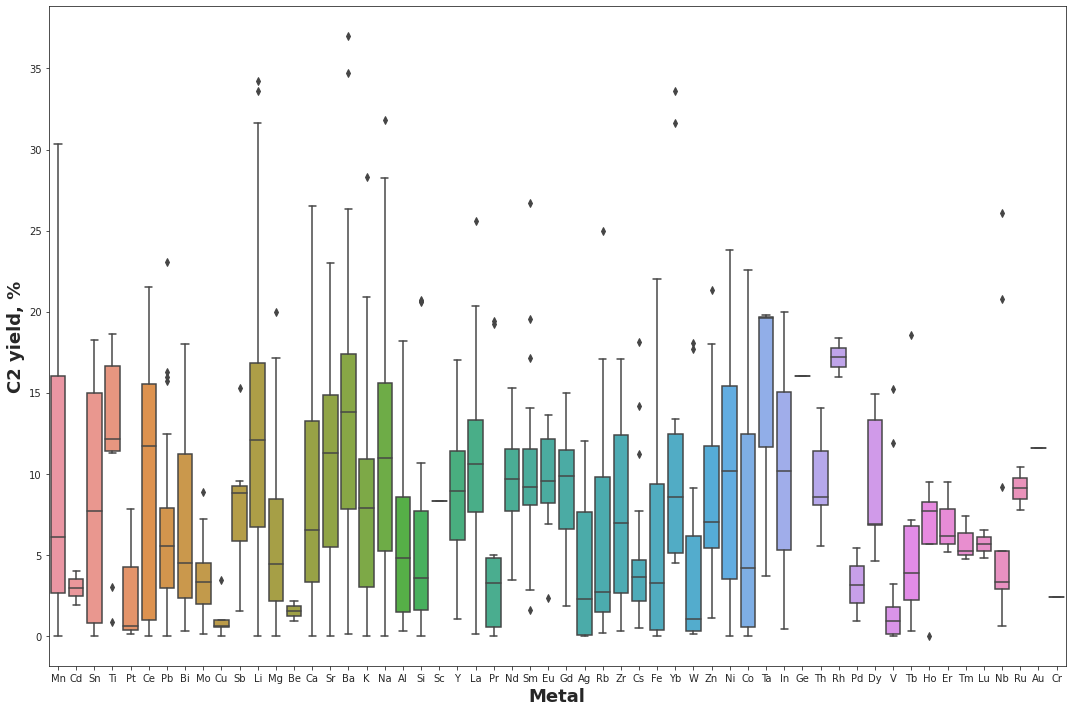

In [35]:
fig, ax = plt.subplots(nrows = 1, ncols = 1, figsize = (15,10))
sns.boxplot(raw_data['Cation_1'], raw_data['Y(C2),_%'], ax = ax)
ax.set_ylabel('C2 yield, %', fontsize = 18, fontweight = 'bold')
ax.set_xlabel('Metal', fontsize = 18, fontweight = 'bold')
plt.tight_layout()
plt.savefig('yieldmetal.png', dpi= 300)


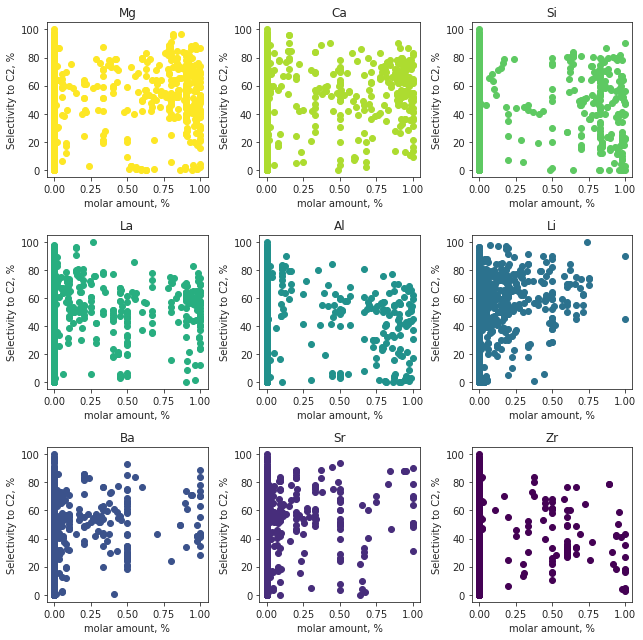

In [36]:
color = ['#fde725','#addc30','#5ec962','#28ae80','#21918c','#2c728e','#3b528b','#472d7b','#440154']
count = 1
max_val = len(composition.mean(axis = 0).sort_values(ascending= False).head(9).keys())
plt.figure(figsize = (9,9))
for element in composition.mean(axis = 0).sort_values(ascending= False).head(9).keys():
  plt.subplot(np.sqrt(max_val),np.sqrt(max_val), count)
  plt.scatter(df[element], df['S(C2),_%'], color = color[count-1])
  plt.title(element)
  plt.xlabel('molar amount, %')
  plt.ylabel('Selectivity to C2, %')
  count +=1
plt.tight_layout()

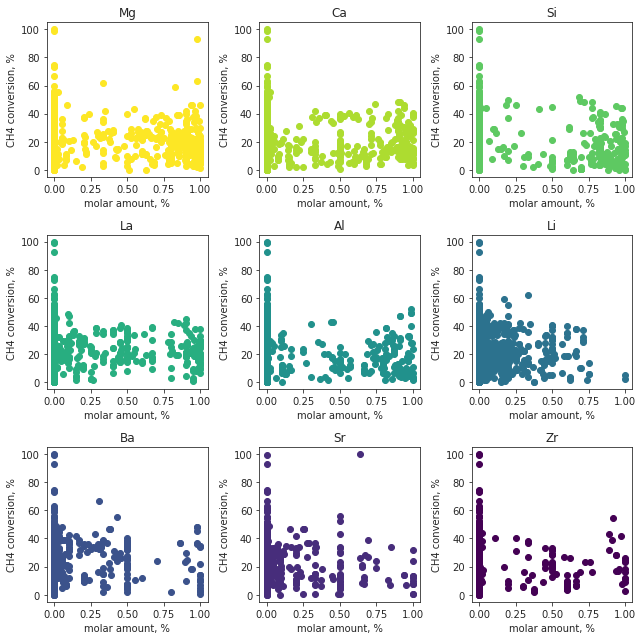

In [37]:
color = ['#fde725','#addc30','#5ec962','#28ae80','#21918c','#2c728e','#3b528b','#472d7b','#440154']
count = 1
max_val = len(composition.mean(axis = 0).sort_values(ascending= False).head(9).keys())
plt.figure(figsize = (9,9))
for element in composition.mean(axis = 0).sort_values(ascending= False).head(9).keys():
  plt.subplot(np.sqrt(max_val),np.sqrt(max_val), count)
  plt.scatter(df[element], df['X(CH4),_%'], color = color[count-1])
  plt.title(element)
  plt.xlabel('molar amount, %')
  plt.ylabel('CH4 conversion, %')
  count +=1
plt.tight_layout()

# Unsupervised learning

In [38]:
n_clusters = list(range(1,21))
scores = []
for cluster in n_clusters:
  kmeans = KMeans(n_clusters= cluster)
  kmeans.fit(composition)
  score = kmeans.score(composition)
  scores.append(score)

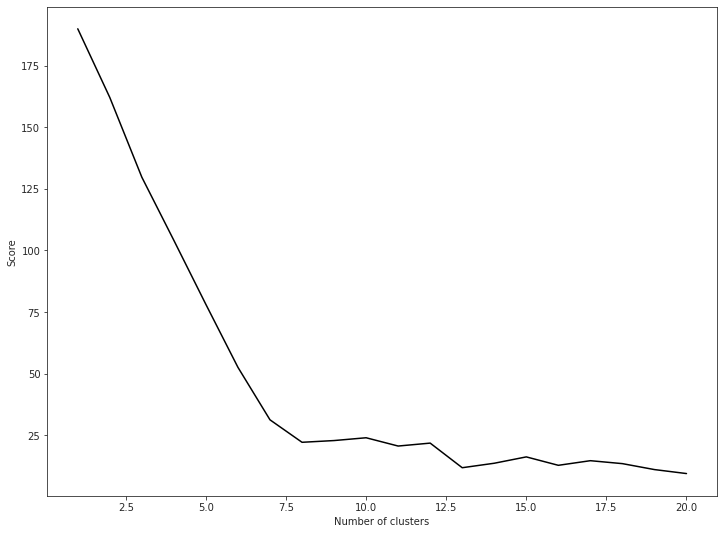

In [39]:
plt.figure(figsize = (12,9))
plt.xlabel('Number of clusters')
plt.ylabel('Score')
#plt.plot([7,7],[0,np.max(np.gradient(scores))])
plt.plot(range(1,21),np.gradient(scores), 'k')

In [40]:
kmeans = KMeans(n_clusters = 7)
kmeans.fit(composition)
kmeans_predictions = kmeans.predict(composition)

# PCA

In [41]:
pca = PCA(n_components = 2)
reducer_01 = pca.fit_transform(composition)

# TSNE

In [42]:
tsne = TSNE(n_components = 2, random_state = 42, init = 'pca')
reducer_02 = tsne.fit_transform(composition)

/usr/local/lib/python3.7/dist-packages/sklearn/manifold/_t_sne.py:793: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/manifold/_t_sne.py:986: FutureWarning: The PCA initialization in TSNE will change to have the standard deviation of PC1 equal to 1e-4 in 1.2. This will ensure better convergence.
  FutureWarning,


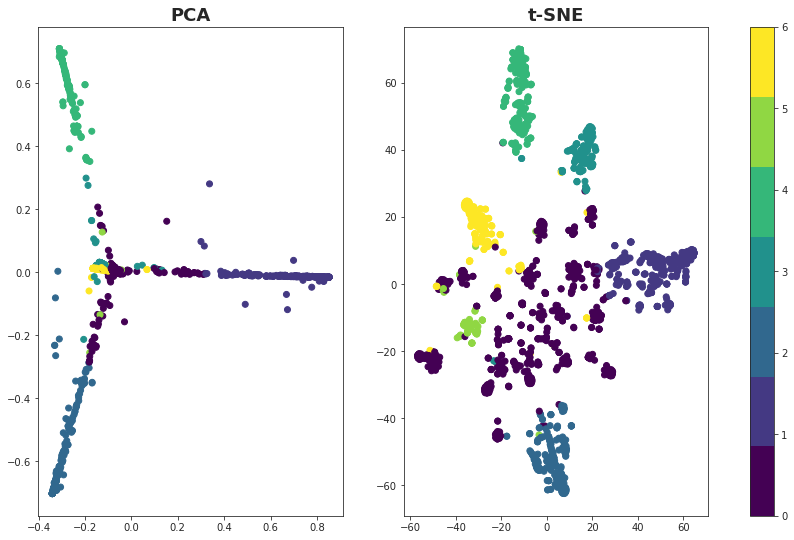

In [43]:
fig, ax = plt.subplots(nrows = 1, ncols =2, figsize = (15,9))
ax[0].set_title('PCA', fontsize = 18, fontweight = 'bold')
ax[1].set_title('t-SNE', fontsize = 18, fontweight = 'bold')
plot1 = ax[0].scatter(reducer_01[:,0],reducer_01[:,1], c = kmeans_predictions, cmap = plt.cm.get_cmap('viridis',7))
plot2 = ax[1].scatter(reducer_02[:,0],reducer_02[:,1], c = kmeans_predictions, cmap = plt.cm.get_cmap('viridis',7))
fig.colorbar(plot2, ax= ax)
#plt.tight_layout()
plt.savefig('PCA.png', dpi= 300)

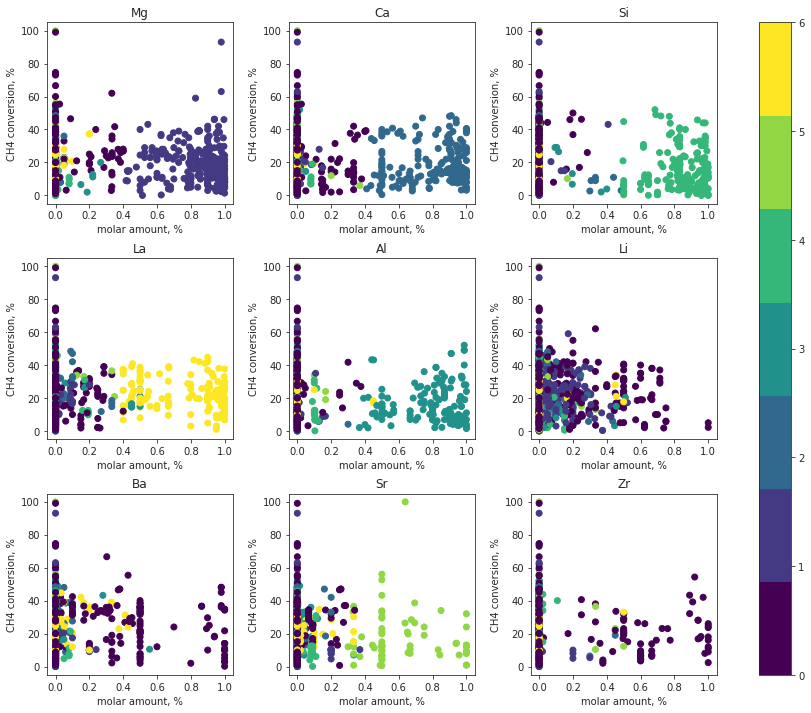

In [44]:
#color = ['#fde725','#addc30','#5ec962','#28ae80','#21918c','#2c728e','#3b528b','#472d7b','#440154']
count = 0
elements = composition.mean(axis = 0).sort_values(ascending= False).head(9).keys()
fig, axs = plt.subplots(nrows = 3, ncols = 3, figsize = (15,12))
fig.subplots_adjust(wspace = 0.3, hspace = 0.3)
for ax in axs.flat:
  ax.set_title(elements[count])
  ax.set_xlabel('molar amount, %')
  ax.set_ylabel('CH4 conversion, %')
  plot = ax.scatter(df[elements[count]], df['X(CH4),_%'], c = kmeans_predictions, cmap = plt.cm.get_cmap('viridis',7))
  count +=1
cb = fig.colorbar(plot,ax = axs)
plt.savefig('convcluster.png', dpi= 300)


# Feature matrix for analysis

In [45]:
pub_nr = raw_data.loc[:,'Catalyst_Nr']
reaction_data = raw_data.loc[:,['Contact_time,_s','Temperature,_K', 'p(CH4),_bar',
       'p(O2),_bar', 'p(CH4)/p(O2)', 'p_total,_bar','X(CH4),_%',
       'S(C2),_%', 'Y(C2),_%']]
list_df = [composition, reaction_data]

In [46]:
data = pd.concat(list_df, axis = 1, sort = True)

In [47]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1802 entries, 0 to 1801
Data columns (total 77 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Ag               1802 non-null   float64
 1   Al               1802 non-null   float64
 2   Au               1802 non-null   float64
 3   B                1802 non-null   float64
 4   Ba               1802 non-null   float64
 5   Be               1802 non-null   float64
 6   Bi               1802 non-null   float64
 7   Br               1802 non-null   float64
 8   C                1802 non-null   float64
 9   Ca               1802 non-null   float64
 10  Cd               1802 non-null   float64
 11  Ce               1802 non-null   float64
 12  Cl               1802 non-null   float64
 13  Co               1802 non-null   float64
 14  Cr               1802 non-null   float64
 15  Cs               1802 non-null   float64
 16  Cu               1802 non-null   float64
 17  Dy            

In [48]:
data.isnull().sum()

Ag              0
Al              0
Au              0
B               0
Ba              0
               ..
p(CH4)/p(O2)    0
p_total,_bar    0
X(CH4),_%       1
S(C2),_%        1
Y(C2),_%        0
Length: 77, dtype: int64

In [49]:
data = data.dropna(how = 'any')

In [50]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1757 entries, 0 to 1801
Data columns (total 77 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Ag               1757 non-null   float64
 1   Al               1757 non-null   float64
 2   Au               1757 non-null   float64
 3   B                1757 non-null   float64
 4   Ba               1757 non-null   float64
 5   Be               1757 non-null   float64
 6   Bi               1757 non-null   float64
 7   Br               1757 non-null   float64
 8   C                1757 non-null   float64
 9   Ca               1757 non-null   float64
 10  Cd               1757 non-null   float64
 11  Ce               1757 non-null   float64
 12  Cl               1757 non-null   float64
 13  Co               1757 non-null   float64
 14  Cr               1757 non-null   float64
 15  Cs               1757 non-null   float64
 16  Cu               1757 non-null   float64
 17  Dy            

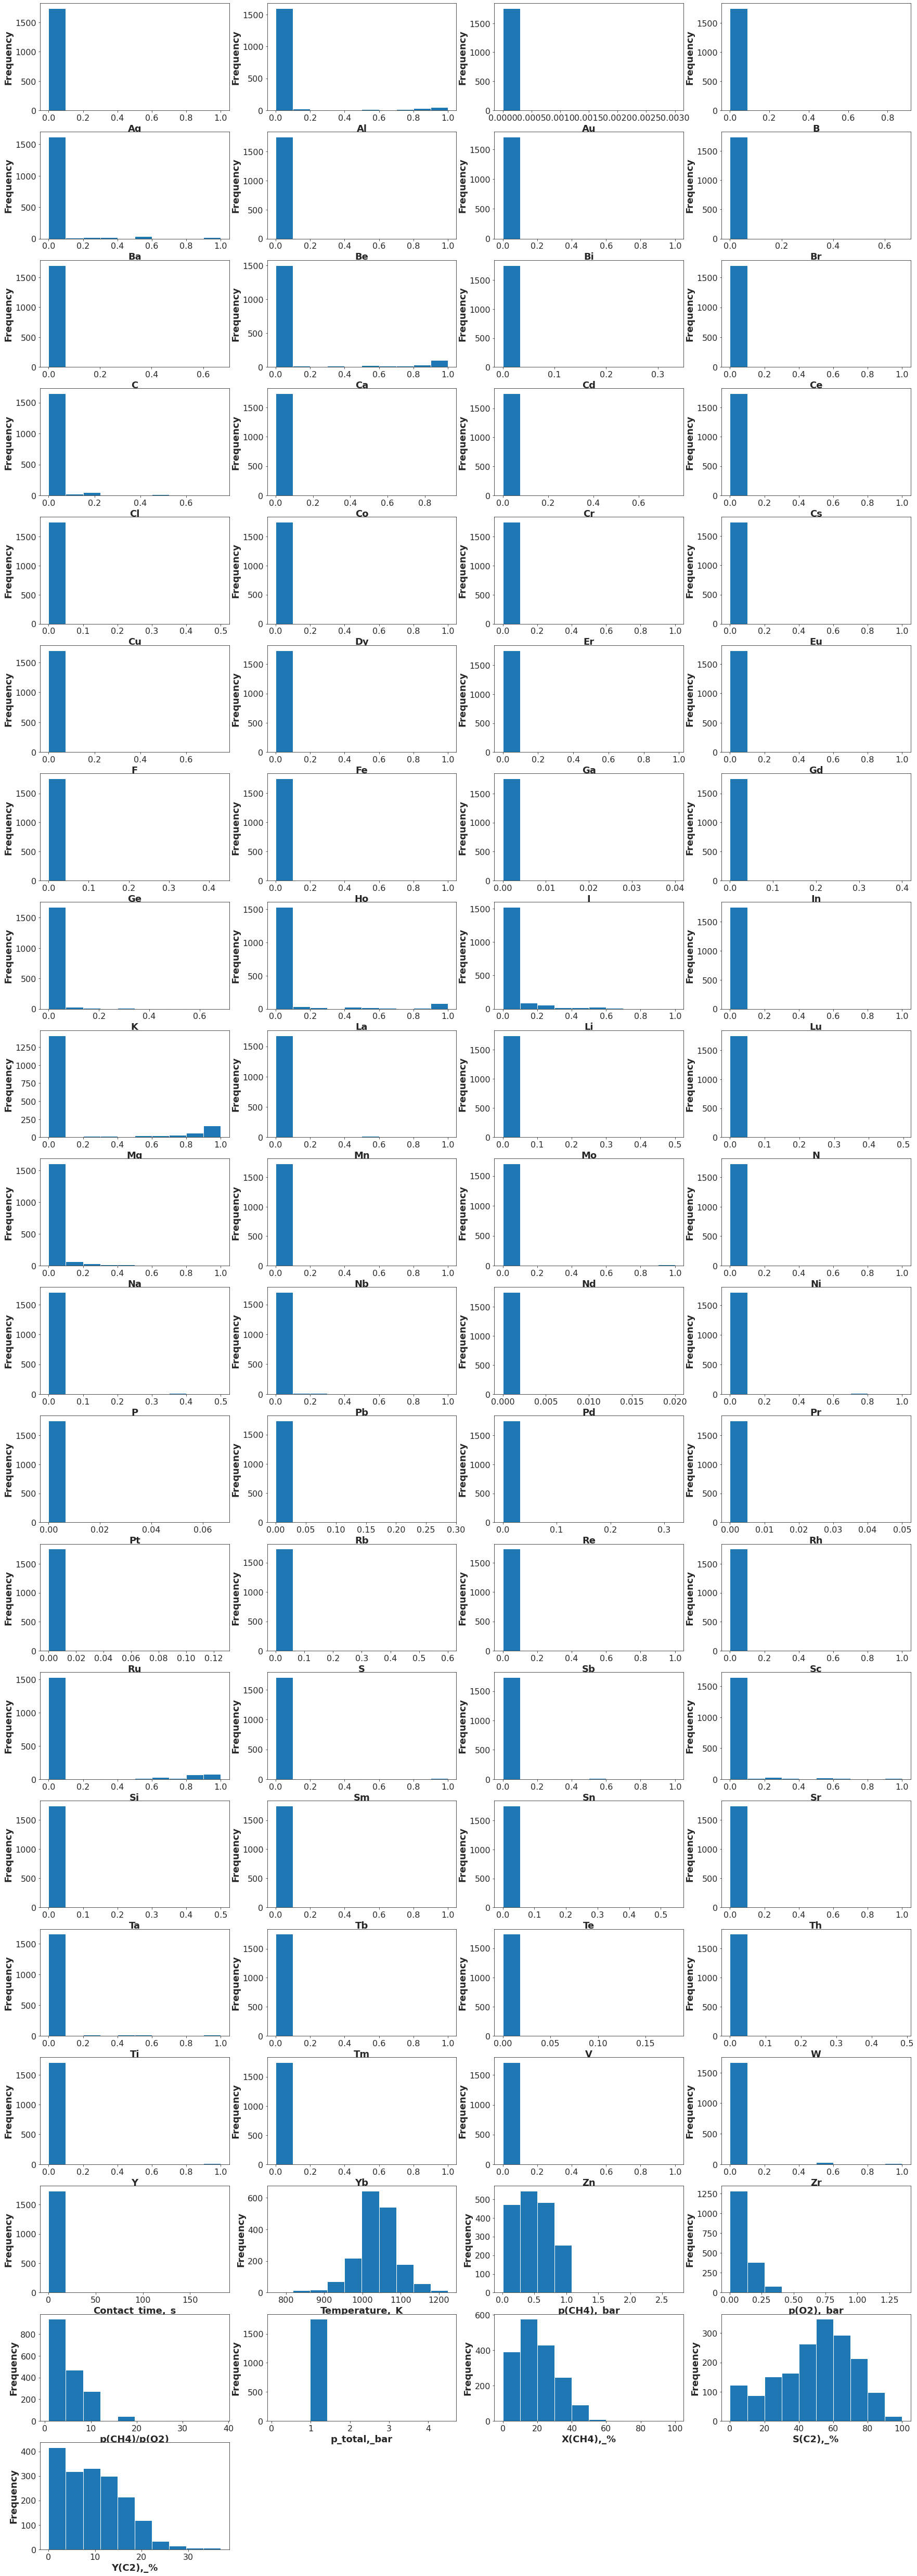

In [51]:
fig = plt.figure(figsize = (30,90))
i = 0
for column in data:
  sub = fig.add_subplot(20,4,i + 1)
  sub.set_xlabel(column,fontsize = 18, fontweight = 'bold')
  sub.set_ylabel('Frequency',fontsize = 18, fontweight = 'bold')
  sub.tick_params(axis='both', labelsize= 16)
  data[column].plot(kind = 'hist')
  i = i + 1

In [52]:
data['yield_range'] = pd.cut(df['Y(C2),_%'], bins = [0,10,20,30,40], labels = ['0<P<=10','10<P<=20','20<P<=30','30<P<=40']) 

In [53]:
data['yield_range']

0       0<P<=10
1       0<P<=10
2       0<P<=10
3       0<P<=10
4       0<P<=10
         ...   
1797    0<P<=10
1798    0<P<=10
1799    0<P<=10
1800    0<P<=10
1801    0<P<=10
Name: yield_range, Length: 1757, dtype: category
Categories (4, object): ['0<P<=10' < '10<P<=20' < '20<P<=30' < '30<P<=40']

## Feature matrix and target vector

In [54]:
reaction_data = raw_data.loc[:,['Temperature,_K', 'p(CH4),_bar',
       'p(O2),_bar', 'p(CH4)/p(O2)', 'p_total,_bar','X(CH4),_%',
       'S(C2),_%', 'Y(C2),_%']]
data_list = [composition, reaction_data]
data = pd.concat(data_list, axis = 1, sort= True)

In [55]:
data.head()

,Ag,Al,Au,B,Ba,Be,Bi,Br,C,Ca,...,Zn,Zr,"Temperature,_K","p(CH4),_bar","p(O2),_bar",p(CH4)/p(O2),"p_total,_bar","X(CH4),_%","S(C2),_%","Y(C2),_%"
0,0.0,0.908,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1073,0.4,0.084,4.761905,1.013,11.0,45.500000,5.0050
1,0.0,0.953,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1073,0.4,0.084,4.761905,1.013,10.0,40.000000,4.0000
2,0.0,0.955,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1073,0.4,0.084,4.761905,1.013,8.4,4.800000,0.4032
3,0.0,0.896,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1073,0.4,0.084,4.761905,1.013,6.8,44.099998,2.9988
4,0.0,0.972,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1073,0.4,0.084,4.761905,1.013,8.0,1.300000,0.1040


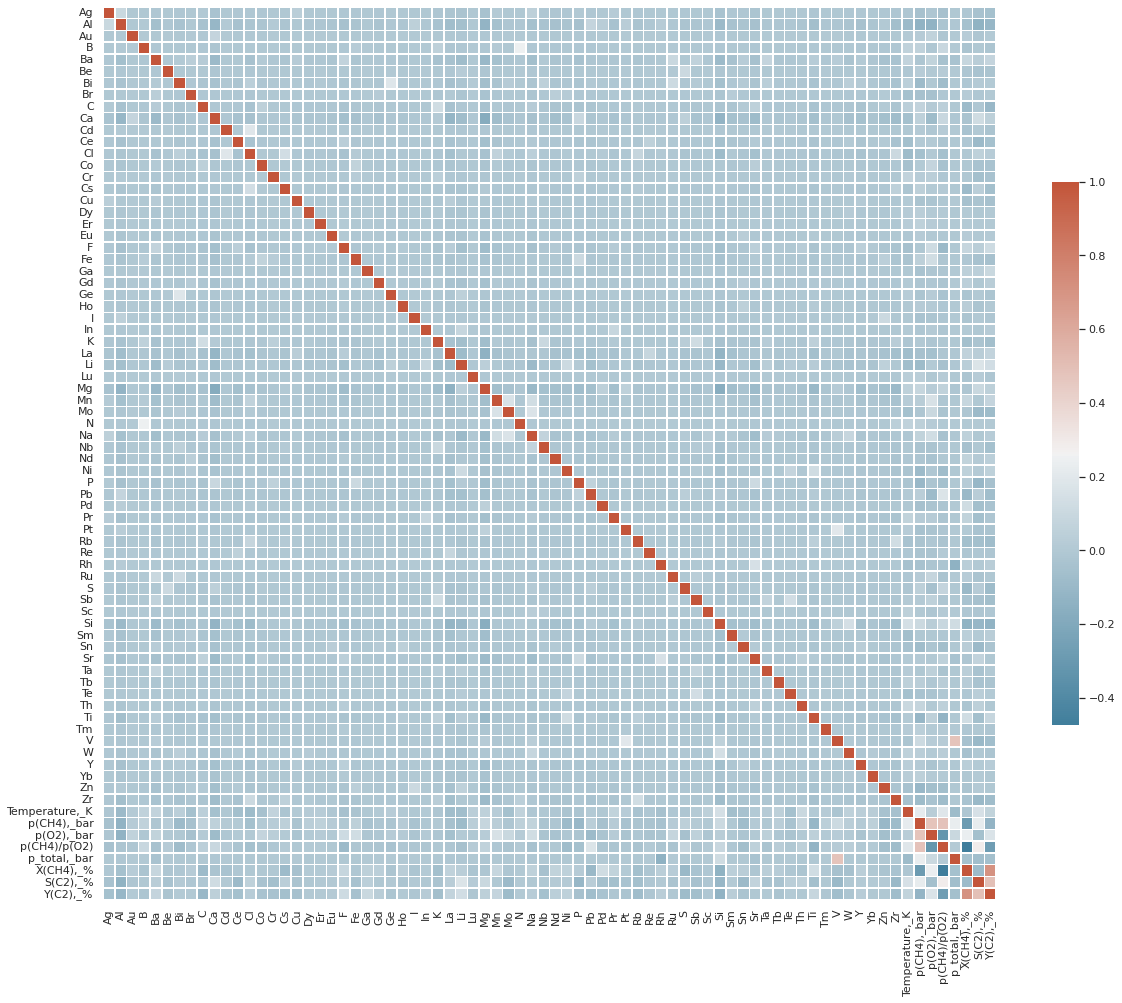

In [56]:
sns.set_theme(style="white")
# Generate a mask for the upper triangle
corr = data.corr()
#mask = np.triu(np.ones_like(corr, dtype=bool))
fig, ax = plt.subplots(figsize=(20, 20))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(230, 20, as_cmap=True)
sns.heatmap(data.corr(), cmap=cmap,square=True, linewidths=.5, cbar_kws={"shrink": .5})
plt.savefig('corrmat.png', dpi = 300)

In [57]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1802 entries, 0 to 1801
Data columns (total 76 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Ag              1802 non-null   float64
 1   Al              1802 non-null   float64
 2   Au              1802 non-null   float64
 3   B               1802 non-null   float64
 4   Ba              1802 non-null   float64
 5   Be              1802 non-null   float64
 6   Bi              1802 non-null   float64
 7   Br              1802 non-null   float64
 8   C               1802 non-null   float64
 9   Ca              1802 non-null   float64
 10  Cd              1802 non-null   float64
 11  Ce              1802 non-null   float64
 12  Cl              1802 non-null   float64
 13  Co              1802 non-null   float64
 14  Cr              1802 non-null   float64
 15  Cs              1802 non-null   float64
 16  Cu              1802 non-null   float64
 17  Dy              1802 non-null   f

In [58]:
data = data.dropna(how = 'any')

In [59]:
data.isnull().sum()

Ag              0
Al              0
Au              0
B               0
Ba              0
               ..
p(CH4)/p(O2)    0
p_total,_bar    0
X(CH4),_%       0
S(C2),_%        0
Y(C2),_%        0
Length: 76, dtype: int64

In [60]:
data.columns

Index(['Ag', 'Al', 'Au', 'B', 'Ba', 'Be', 'Bi', 'Br', 'C', 'Ca', 'Cd', 'Ce',
       'Cl', 'Co', 'Cr', 'Cs', 'Cu', 'Dy', 'Er', 'Eu', 'F', 'Fe', 'Ga', 'Gd',
       'Ge', 'Ho', 'I', 'In', 'K', 'La', 'Li', 'Lu', 'Mg', 'Mn', 'Mo', 'N',
       'Na', 'Nb', 'Nd', 'Ni', 'P', 'Pb', 'Pd', 'Pr', 'Pt', 'Rb', 'Re', 'Rh',
       'Ru', 'S', 'Sb', 'Sc', 'Si', 'Sm', 'Sn', 'Sr', 'Ta', 'Tb', 'Te', 'Th',
       'Ti', 'Tm', 'V', 'W', 'Y', 'Yb', 'Zn', 'Zr', 'Temperature,_K',
       'p(CH4),_bar', 'p(O2),_bar', 'p(CH4)/p(O2)', 'p_total,_bar',
       'X(CH4),_%', 'S(C2),_%', 'Y(C2),_%'],
      dtype='object')

In [61]:
X = data.loc[:,['Mg','Ca','Si','La','Al','Li','Ba','Sr','Zr','Temperature,_K', 'p(CH4)/p(O2)', 'p_total,_bar']]

In [62]:
y = data.loc[:,'Y(C2),_%']

In [63]:
y.shape

(1801,)

## Train and test data sets

In [64]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size = 0.33,random_state = 42)

## Feature scaling

In [65]:
scaler = StandardScaler()

In [66]:
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

## SVM

In [67]:
hyper_params_svr = {'gamma':np.random.normal(12,2,10000), 'C':np.random.normal(1,0.2,10000)}
svr_tune = SVR(kernel = 'rbf')
g_search  = RandomizedSearchCV(svr_tune, hyper_params_svr, cv = 5, n_jobs = -1, random_state = 42)
g_search.fit(X_train, y_train)
print('Best estimators', g_search.best_estimator_)

Best estimators SVR(C=1.0533540898956775, gamma=8.343825879129035)


In [68]:
best_C = g_search.best_estimator_.C
best_gamma = g_search.best_estimator_.gamma

In [69]:
svr_rbf = SVR(kernel = 'rbf', C= best_C,gamma = best_gamma)

In [70]:
y_svr = svr_rbf.fit(X_train, y_train)

In [71]:
predict_svr_train = svr_rbf.predict(X_train)
predict_svr_test = svr_rbf.predict(X_test)

In [72]:
mean_squared_error(y_test,predict_svr_test)

40.46358799467628

In [73]:
mean_squared_error(y_train,predict_svr_train)

29.51213590782588

In [74]:
r2_score(y_test,predict_svr_test)

0.11372161867148234

## XGBoost

In [75]:
n_estimators = list(range(1,100,10))
scores = []
for estimator in n_estimators:
  xgb = XGBRegressor(n_estimators= estimator, objective = 'reg:squarederror')
  xgb.fit(X_train, y_train)
  y_pred_xgb = xgb.predict(X_test)
  MSE = r2_score(y_test, y_pred_xgb)
  scores.append(MSE)

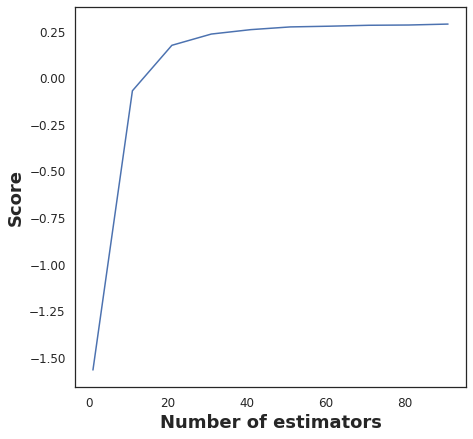

In [76]:
fig, ax = plt.subplots(nrows = 1, ncols = 1, figsize = (7,7))
ax.plot(n_estimators, scores)
ax.set_xlabel('Number of estimators', fontsize = 18, fontweight = 'bold')
ax.set_ylabel('Score', fontsize = 18, fontweight = 'bold')
ax.tick_params(axis='both', labelsize= 12)

In [77]:
xgb = XGBRegressor(n_estimators = 2, objective = 'reg:squarederror')
xgb.fit(X_train, y_train)
y_pred_xgb = xgb.predict(X_test)

In [78]:
mean_squared_error(y_test, y_pred_xgb, squared=False)

10.160570159095425

## Random Forest

In [79]:
n_estimators_rf = list(range(1,100,10))
scores_rf = []
for estimator in n_estimators:
  rf = RandomForestRegressor(n_estimators= estimator, bootstrap = True, random_state = 42)
  rf.fit(X_train, y_train)
  y_pred_rf = rf.predict(X_test)
  MSE_rf = r2_score(y_test, y_pred_rf)
  scores_rf.append(MSE_rf)

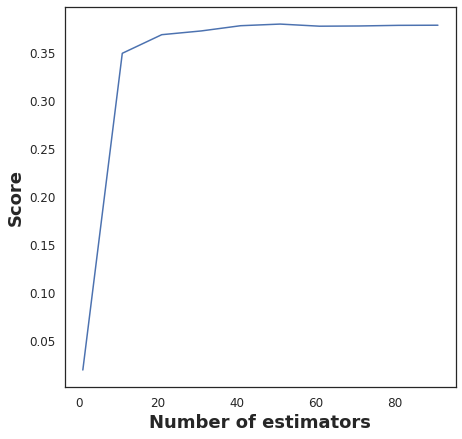

In [80]:
fig, ax = plt.subplots(nrows = 1, ncols = 1, figsize = (7,7))
ax.plot(n_estimators_rf, scores_rf)
ax.set_xlabel('Number of estimators', fontsize = 18, fontweight = 'bold')
ax.set_ylabel('Score', fontsize = 18, fontweight = 'bold')
ax.tick_params(axis='both', labelsize= 12)

## Extra Tree Regressor

In [81]:
n_estimators_xtr = list(range(1,100,10))
scores_xtr = []
for estimator in n_estimators:
  xtr = ExtraTreesRegressor(n_estimators= estimator, bootstrap = True, random_state = 42)
  xtr.fit(X_train, y_train)
  y_pred_xtr = xtr.predict(X_test)
  MSE_xtr = r2_score(y_test, y_pred_xtr)
  scores_xtr.append(MSE_xtr)


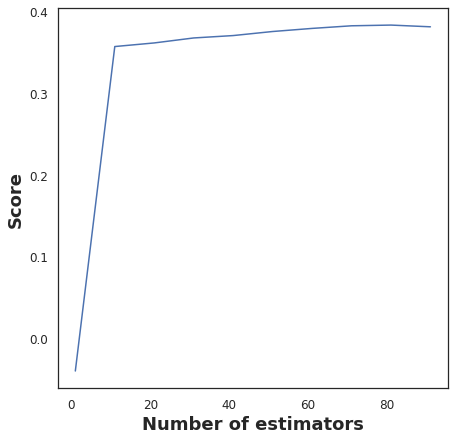

In [82]:
fig, ax = plt.subplots(nrows = 1, ncols = 1, figsize = (7,7))
ax.plot(n_estimators_xtr, scores_xtr)
ax.set_xlabel('Number of estimators', fontsize = 18, fontweight = 'bold')
ax.set_ylabel('Score', fontsize = 18, fontweight = 'bold')
ax.tick_params(axis='both', labelsize= 12)

## Feature Selection XGBoost

In [83]:
X.columns

Index(['Mg', 'Ca', 'Si', 'La', 'Al', 'Li', 'Ba', 'Sr', 'Zr', 'Temperature,_K',
       'p(CH4)/p(O2)', 'p_total,_bar'],
      dtype='object')

In [84]:
!pip install shap

     |████████████████████████████████| 564 kB 4.1 MB/s 


In [85]:
import shap

In [86]:
model = XGBRegressor(n_estimators = 60, objective = 'reg:squarederror').fit(X_train, y_train)
explainer = shap.TreeExplainer(model, feature_names= ['Mg','Ca','Si','La','Al','Li','Ba','Sr','Zr','Temperature,_K', 'p(CH4)/p(O2)', 'p_total,_bar'] )
shap_values = explainer(X_test)

In [87]:
shap_values.shape

(595, 12)

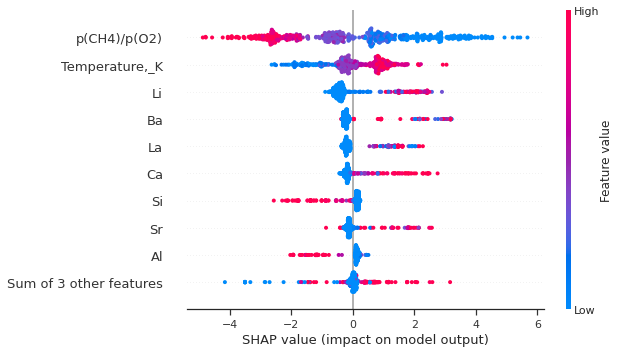

In [88]:
shap.plots.beeswarm(shap_values)

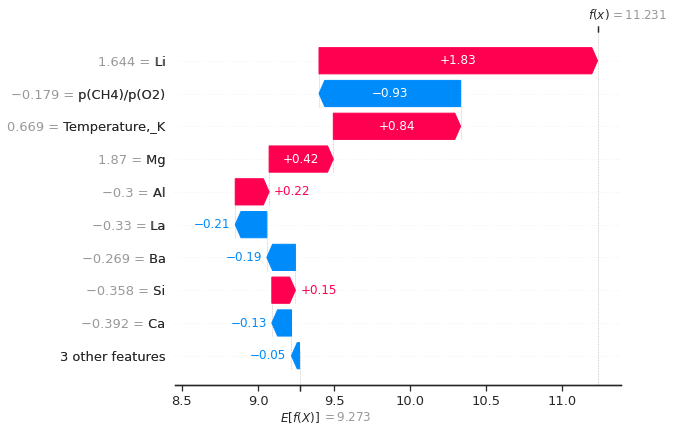

In [89]:
shap.plots.waterfall(shap_values[594])

In [90]:
 model_xtr = ExtraTreesRegressor(n_estimators= 60, bootstrap = True, random_state = 42).fit(X_train, y_train)
 explainer_xtr = shap.TreeExplainer(model,feature_names= ['Mg','Ca','Si','La','Al','Li','Ba','Sr','Zr','Temperature,_K', 'p(CH4)/p(O2)', 'p_total,_bar'])
 shap_values_xtr = explainer_xtr(X_test)

In [91]:
shap_values_xtr.shape

(595, 12)

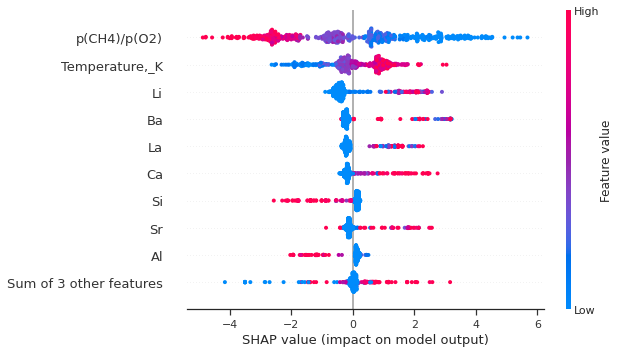

In [92]:
shap.plots.beeswarm(shap_values_xtr)

In [93]:
 model_rf = RandomForestRegressor(n_estimators= 60, bootstrap = True, random_state = 42).fit(X_train, y_train)
 explainer_rf = shap.TreeExplainer(model,feature_names= ['Mg','Ca','Si','La','Al','Li','Ba','Sr','Zr','Temperature,_K', 'p(CH4)/p(O2)', 'p_total,_bar'])
 shap_values_rf = explainer_rf(X_test)

In [94]:
shap_values_rf.shape

(595, 12)

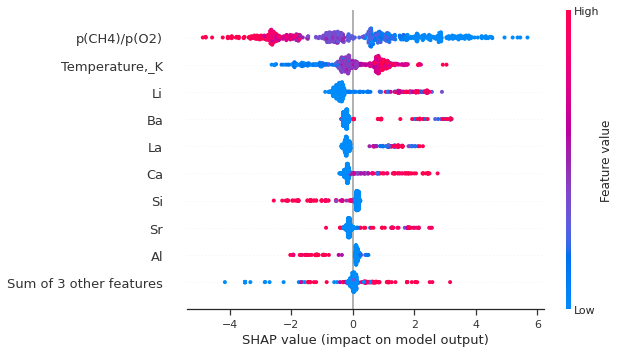

In [95]:
shap.plots.beeswarm(shap_values_rf)